## Here we explore a custom self sampled datset. The datset was sampled from FMA

In [5]:
import os
import pandas as pd
from mutagen.mp3 import MP3

In [12]:
def get_genre_stats(root_dir):
    # Expand the tilde to the full home directory path
    root_dir = os.path.expanduser(root_dir)
    
    data = []
    for genre in os.listdir(root_dir):
        genre_dir = os.path.join(root_dir, genre)
        if not os.path.isdir(genre_dir):
            continue
        
        num_tracks = 0
        total_duration = 0.0
        
        for file in os.listdir(genre_dir):
            if file.endswith('.mp3'):
                file_path = os.path.join(genre_dir, file)
                try:
                    audio = MP3(file_path)
                    total_duration += audio.info.length
                    num_tracks += 1
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
        
        data.append({
            'genre': genre,
            'number_of_tracks': num_tracks,
            'total_duration_seconds': total_duration
        })
    
    return pd.DataFrame(data)

In [13]:
df = get_genre_stats('~/data/project/music')

In [14]:
df.head()

,genre,number_of_tracks,total_duration_seconds
0,rock-garage,4,740.968585
1,pop,15,3041.159971
2,metal,12,3553.129043
3,blues,14,3109.498797
4,rnb,14,3229.232741


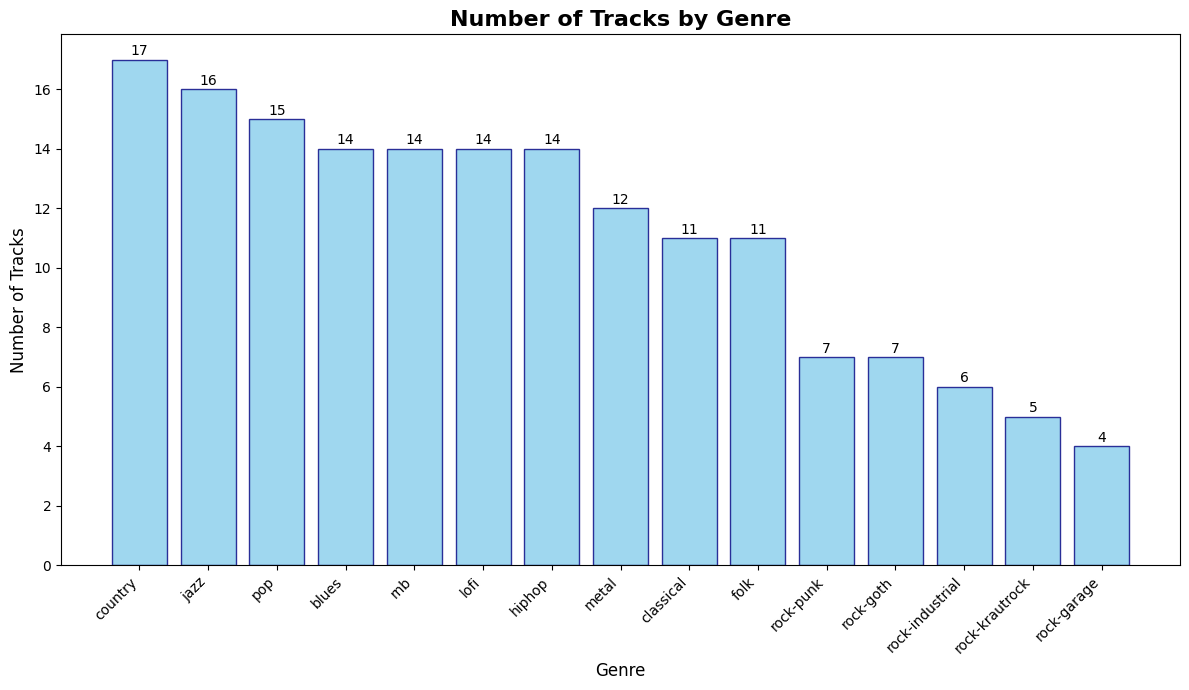

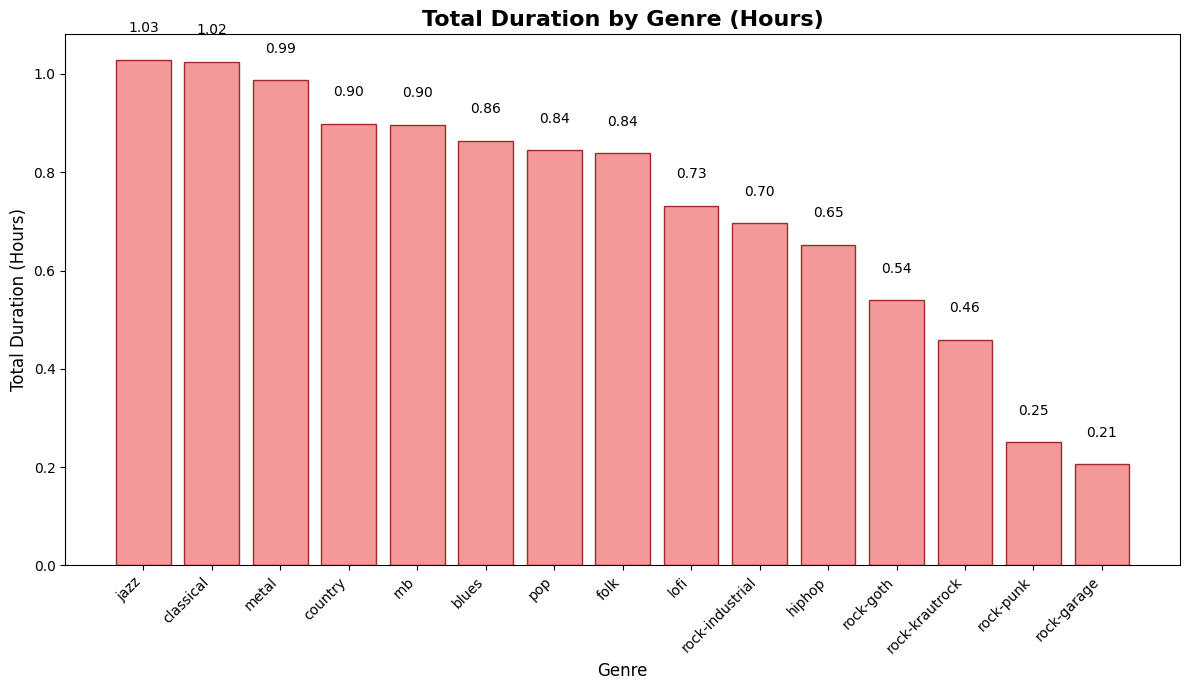

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have your DataFrame 'df' from the previous function

# Convert total duration from seconds to hours for better readability
df['total_duration_hours'] = df['total_duration_seconds'] / 3600

# Sort the DataFrame by number of tracks for better visualization
df_sorted_tracks = df.sort_values('number_of_tracks', ascending=False)

# First plot: Number of tracks per genre
plt.figure(figsize=(12, 7))
bars = plt.bar(df_sorted_tracks['genre'], df_sorted_tracks['number_of_tracks'], 
               color='skyblue', edgecolor='navy', alpha=0.8)
plt.title('Number of Tracks by Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Sort the DataFrame by total duration for better visualization
df_sorted_duration = df.sort_values('total_duration_hours', ascending=False)

# Second plot: Total duration per genre
plt.figure(figsize=(12, 7))
bars = plt.bar(df_sorted_duration['genre'], df_sorted_duration['total_duration_hours'], 
               color='lightcoral', edgecolor='darkred', alpha=0.8)
plt.title('Total Duration by Genre (Hours)', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Duration (Hours)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()